In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv("./concrete_data.csv")

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
x = df.drop(columns=['Strength'], axis=1)
y = df['Strength']

In [21]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [23]:
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.4609940491662865

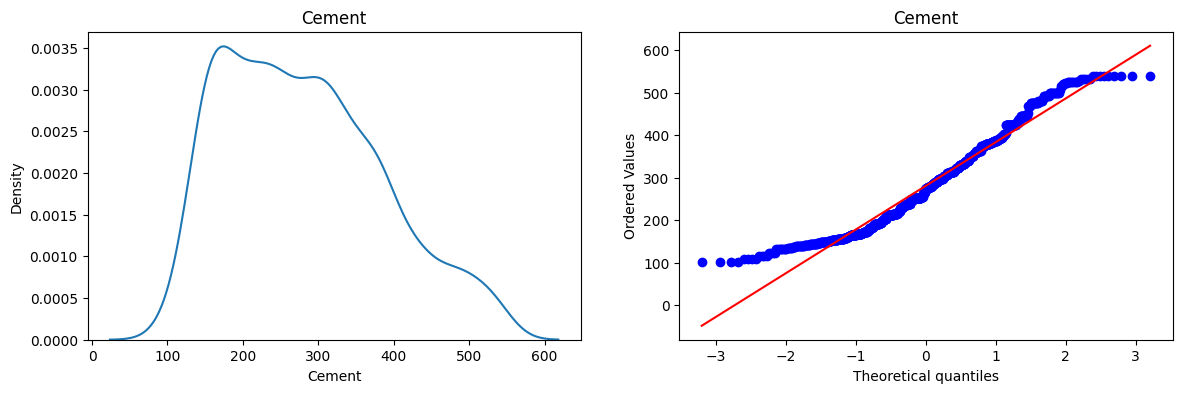

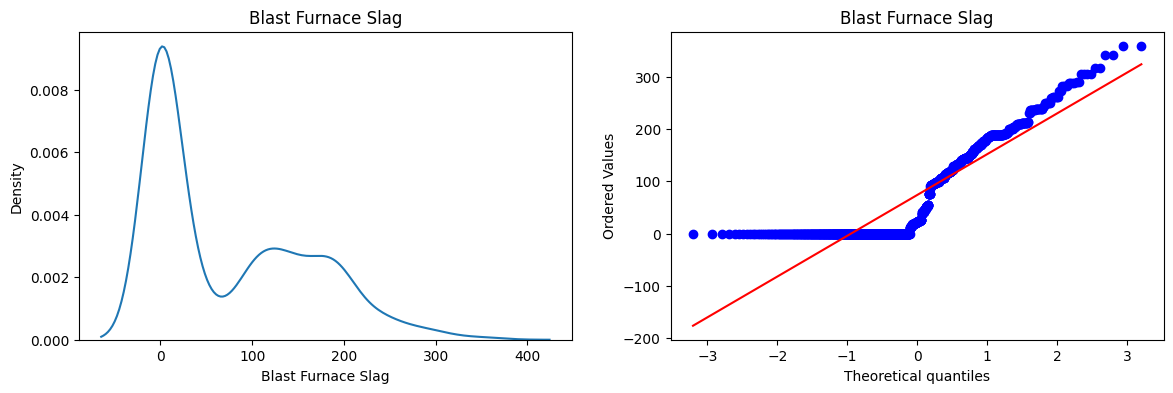

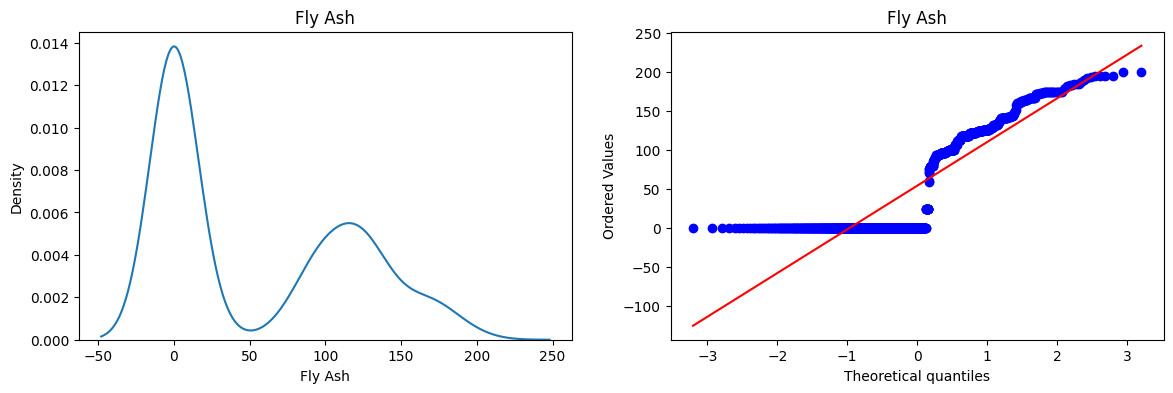

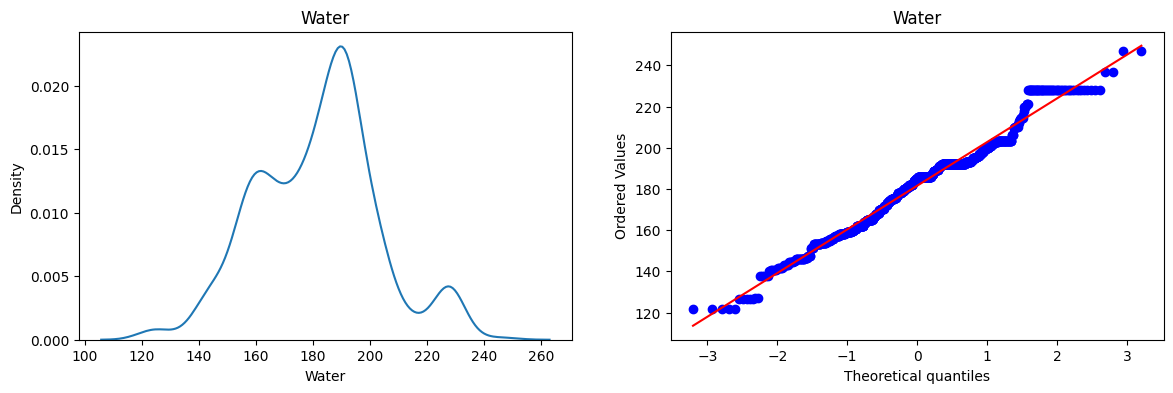

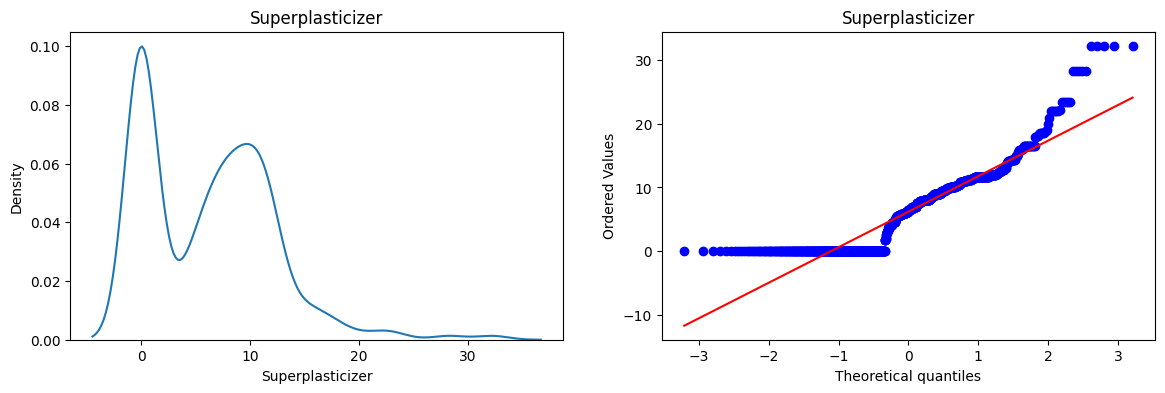

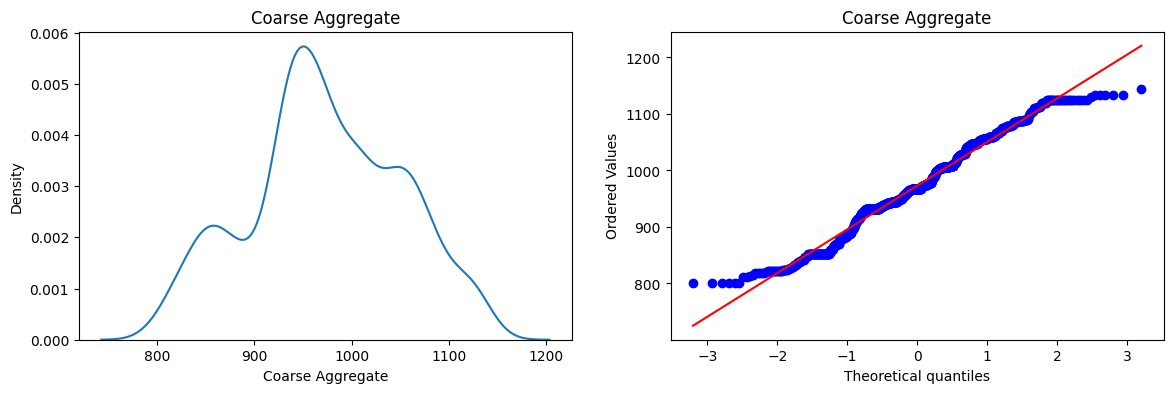

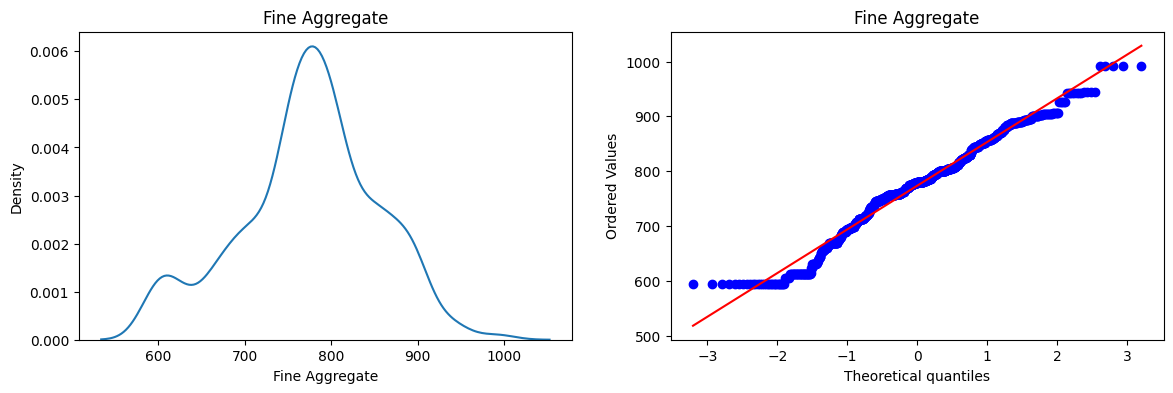

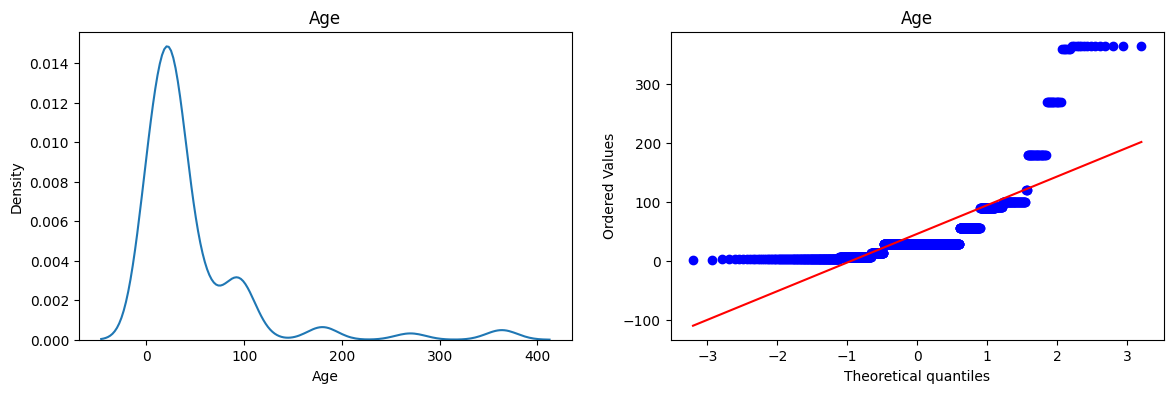

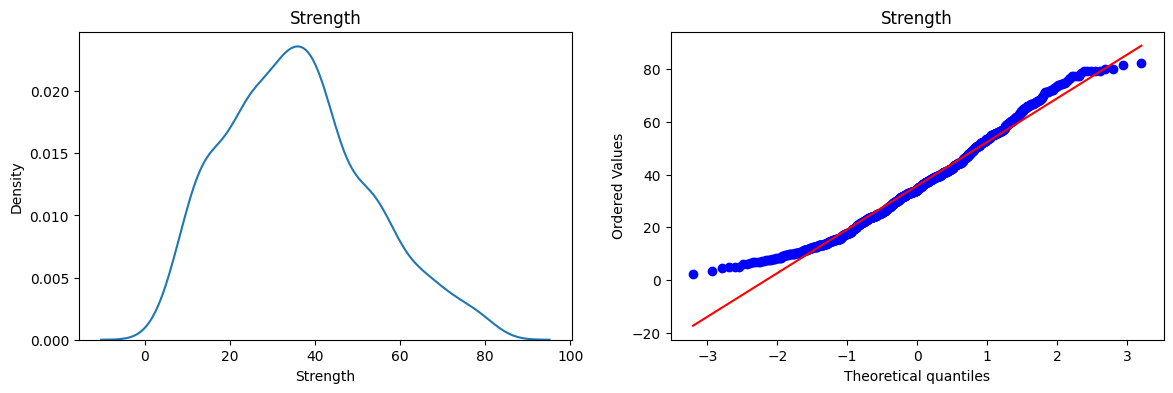

In [24]:
for cols in df.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(df[cols])
    plt.title(cols)

    plt.subplot(122)
    stats.probplot(df[cols], plot=plt)
    plt.title(cols)

    plt.show()

### Now appling box-cox transformation

In [26]:
# now applying box-cox transformation

pt = PowerTransformer(method='box-cox')

In [29]:
xTransformed = pt.fit_transform(x+0.0000001)

In [30]:
np.mean(cross_val_score(lr, xTransformed, y, scoring='r2'))

0.6658537939913378

In [35]:
dfNew = pd.DataFrame(xTransformed, columns=x.columns)

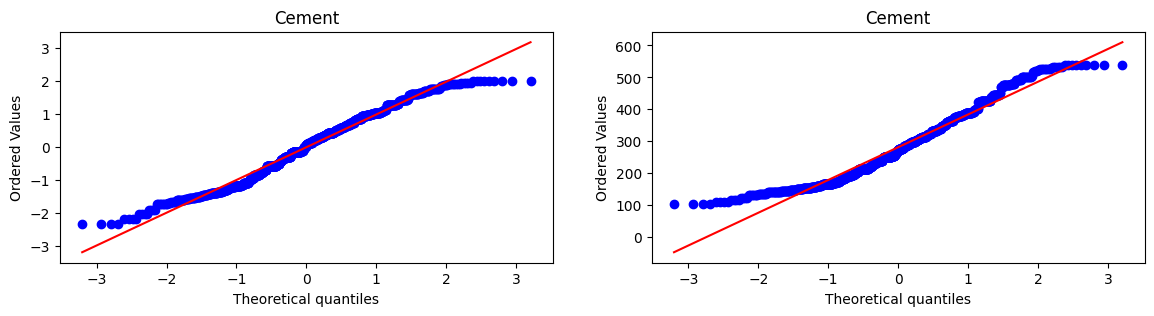

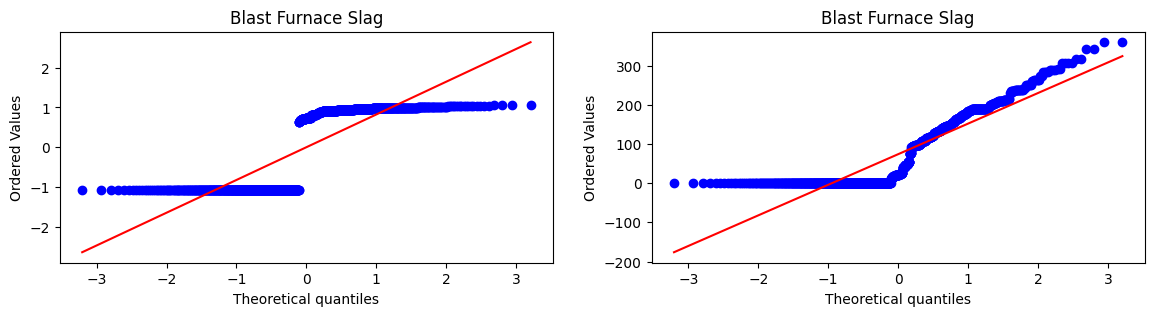

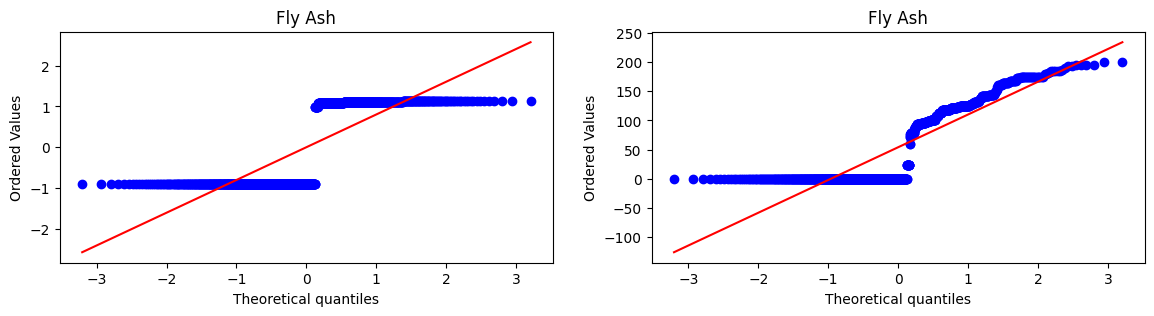

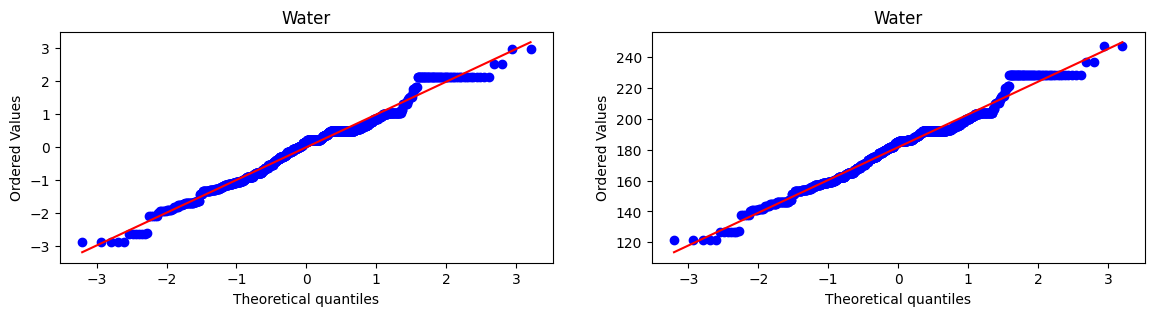

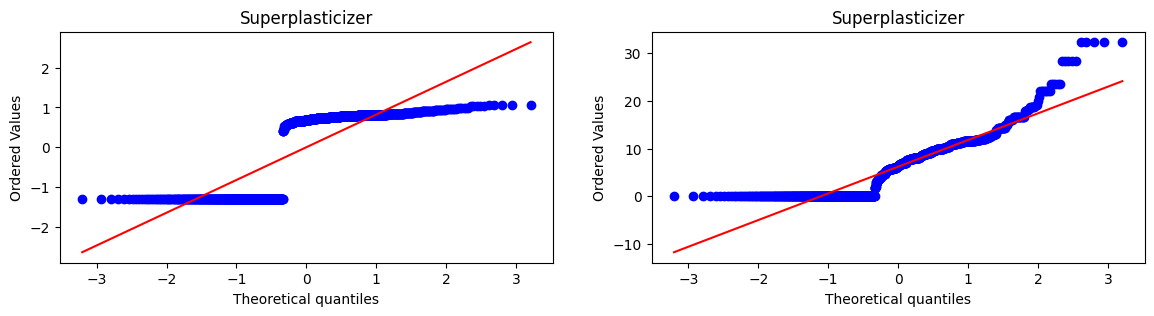

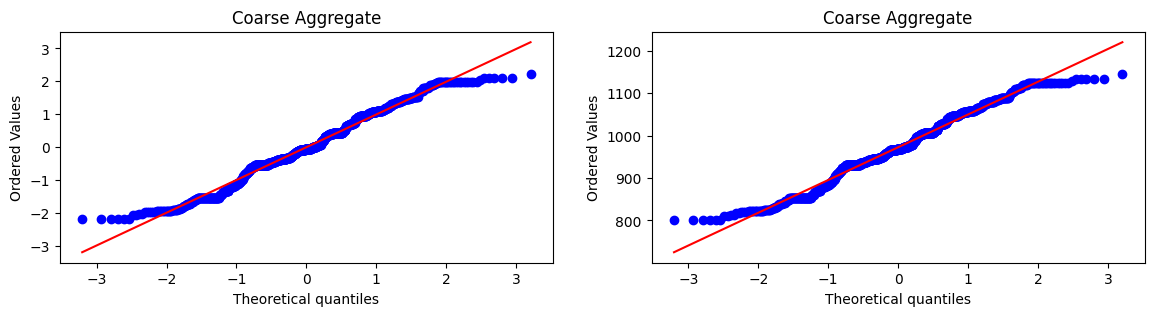

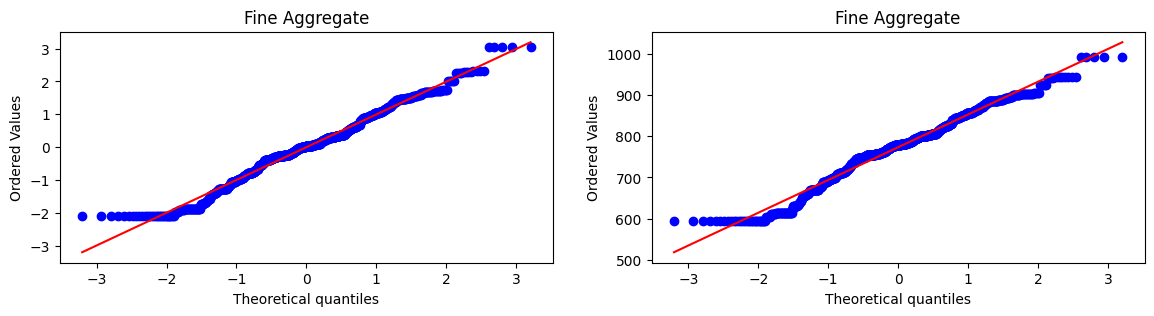

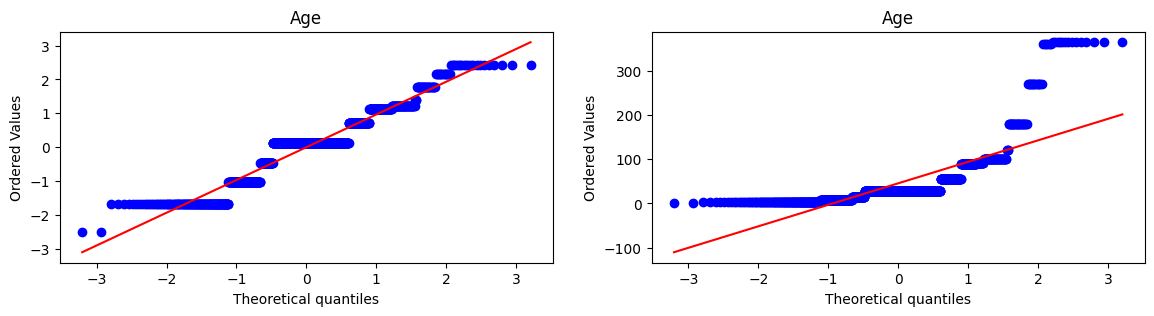

In [39]:
for cols in dfNew.columns:
    plt.figure(figsize=(14,3))

    plt.subplot(121)
    stats.probplot(dfNew[cols], plot=plt)
    plt.title(cols)

    plt.subplot(122)
    stats.probplot(df[cols], plot=plt)
    plt.title(cols)

    plt.show()

## Yeo-Johnson Transformation

In [40]:
pt = PowerTransformer()

In [43]:
xTrained = pt.fit_transform(x)

In [44]:
xTrained = pd.DataFrame(xTrained, columns=x.columns)

In [46]:
lr2 = LinearRegression()

In [48]:
lr2.fit(xTrained, y)

LinearRegression()

In [49]:
np.mean(cross_val_score(lr2,xTrained,y,scoring='r2'))

0.6834625141500863